In [ ]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

(4.0, 10.0)

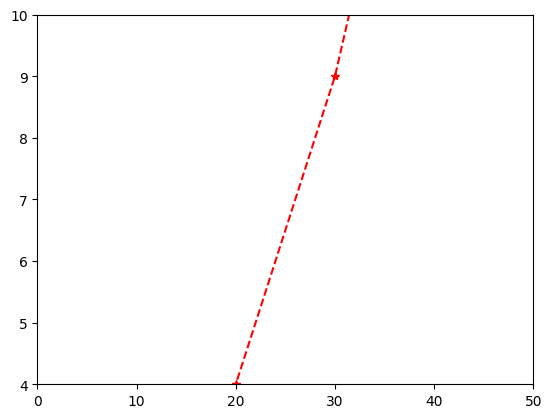

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x_data = np.array([10, 20, 30, 40])
y_data = np.array([1, 4, 9, 16])


plt.plot(x_data, y_data, 'r--*')
plt.xlim(0, 50)
plt.ylim(4, 10)

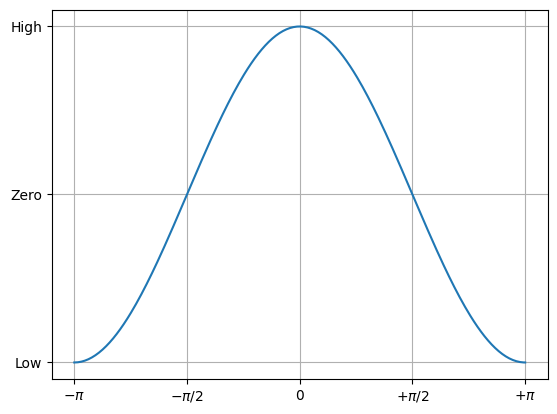

In [7]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)

plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.grid(True)
plt.show()


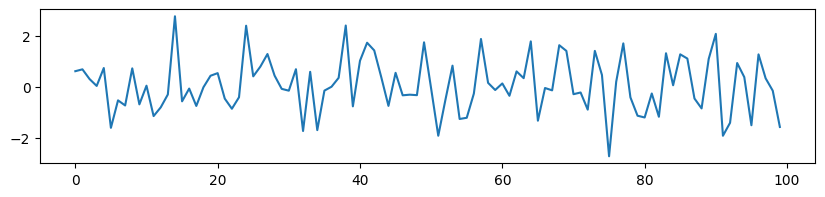

In [9]:
f1 = plt.figure(figsize=(10,2))
plt.plot(np.random.randn(100))
plt.show()

Axes(0.125,0.53;0.775x0.35)
Axes(0.125,0.11;0.775x0.35)


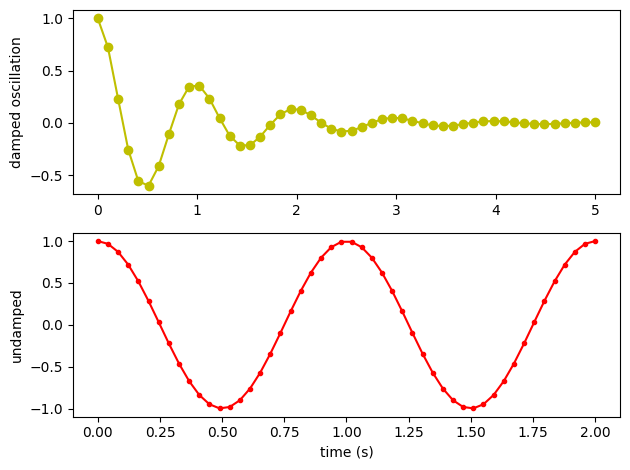

In [11]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.ylabel('damped oscillation')
print(ax1)

ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('undamped')
print(ax2)

plt.tight_layout()
plt.show()

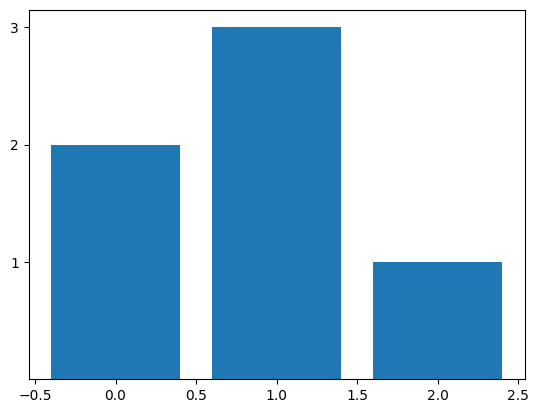

In [13]:
y = [2, 3, 1]
x = np.arange(len(y))

plt.bar(x, y)
plt.yticks(sorted(y))
plt.yticks(y)

plt.show()

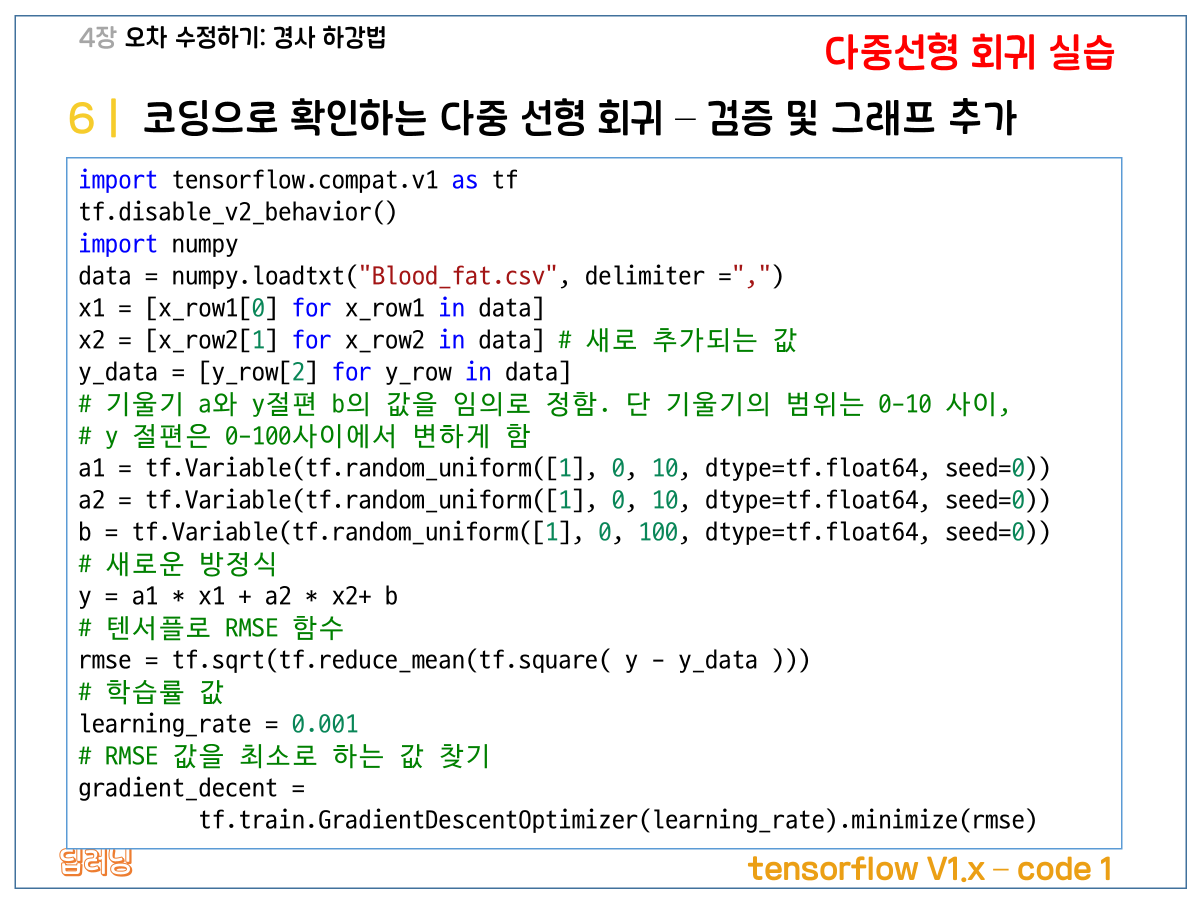

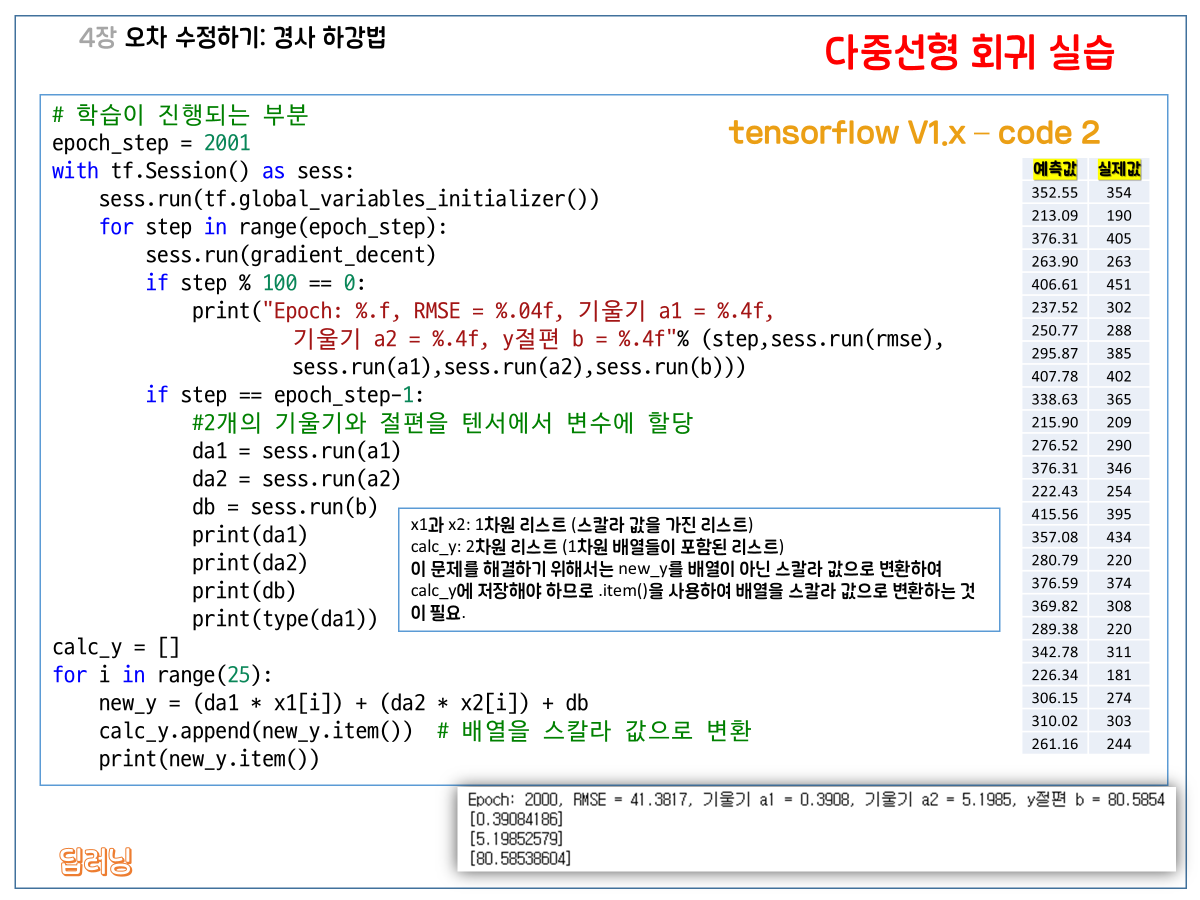

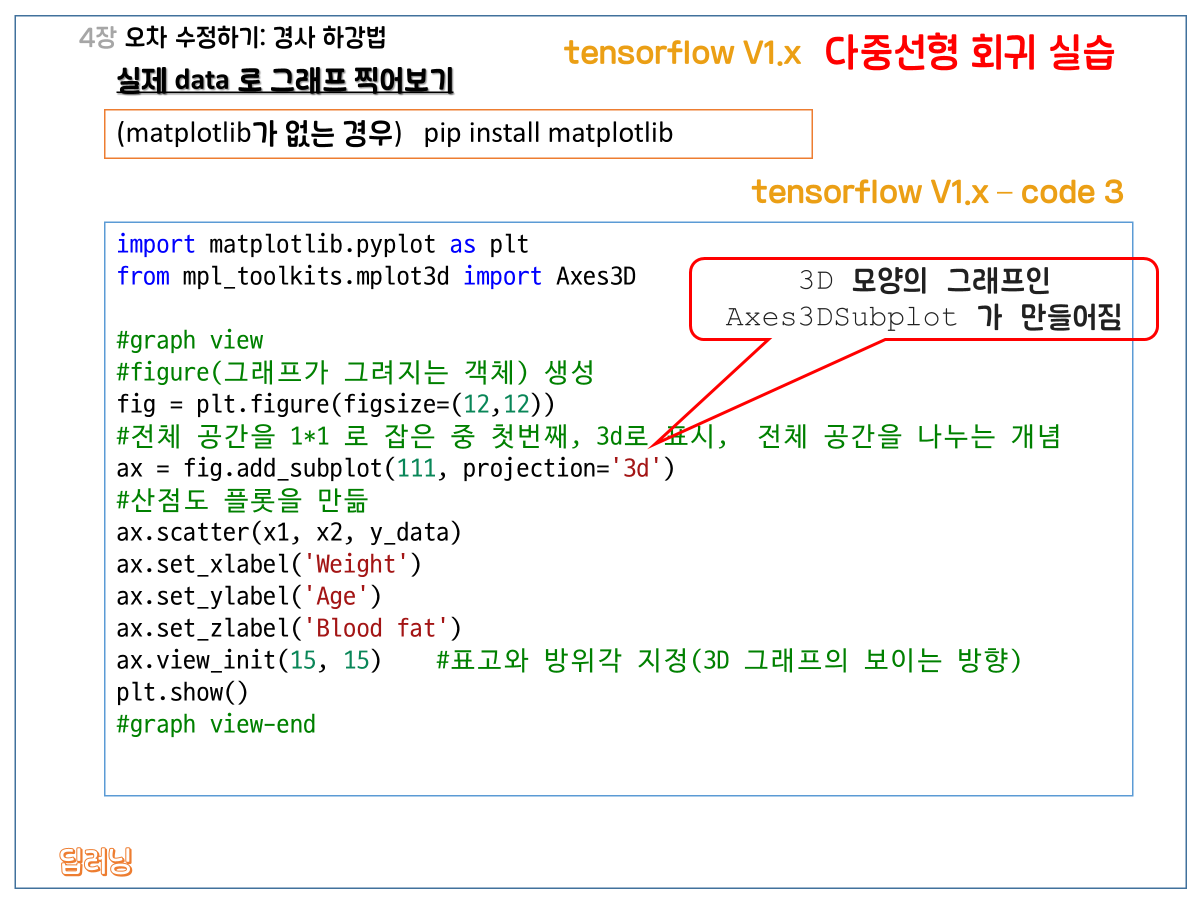

Instructions for updating:
non-resource variables are not supported in the long term
<ipython-input-14-ef56c8378c7b>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Epoch : %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y 절편 b = %.4f" % (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))


Epoch : 0, RMSE = 643.9146, 기울기 a1 = 7.9995, 기울기 a2 = 8.0295, y 절편 b = 80.6891
Epoch : 100, RMSE = 51.0198, 기울기 a1 = 1.2999, 기울기 a2 = 4.2778, y 절편 b = 80.5946
Epoch : 200, RMSE = 42.6573, 기울기 a1 = 0.8654, 기울기 a2 = 4.3693, y 절편 b = 80.5900
Epoch : 300, RMSE = 42.1239, 기울기 a1 = 0.7509, 기울기 a2 = 4.5693, y 절편 b = 80.5895
Epoch : 400, RMSE = 41.8101, 기울기 a1 = 0.6632, 기울기 a2 = 4.7227, y 절편 b = 80.5890
Epoch : 500, RMSE = 41.6278, 기울기 a1 = 0.5962, 기울기 a2 = 4.8396, y 절편 b = 80.5887
Epoch : 600, RMSE = 41.5226, 기울기 a1 = 0.5454, 기울기 a2 = 4.9284, y 절편 b = 80.5883
Epoch : 700, RMSE = 41.4623, 기울기 a1 = 0.5069, 기울기 a2 = 4.9956, y 절편 b = 80.5880
Epoch : 800, RMSE = 41.4277, 기울기 a1 = 0.4778, 기울기 a2 = 5.0465, y 절편 b = 80.5878
Epoch : 900, RMSE = 41.4080, 기울기 a1 = 0.4558, 기울기 a2 = 5.0850, y 절편 b = 80.5875
Epoch : 1000, RMSE = 41.3967, 기울기 a1 = 0.4392, 기울기 a2 = 5.1141, y 절편 b = 80.5873
Epoch : 1100, RMSE = 41.3902, 기울기 a1 = 0.4266, 기울기 a2 = 5.1361, y 절편 b = 80.5871
Epoch : 1200, RMSE = 41.3865, 기울기 a1 = 

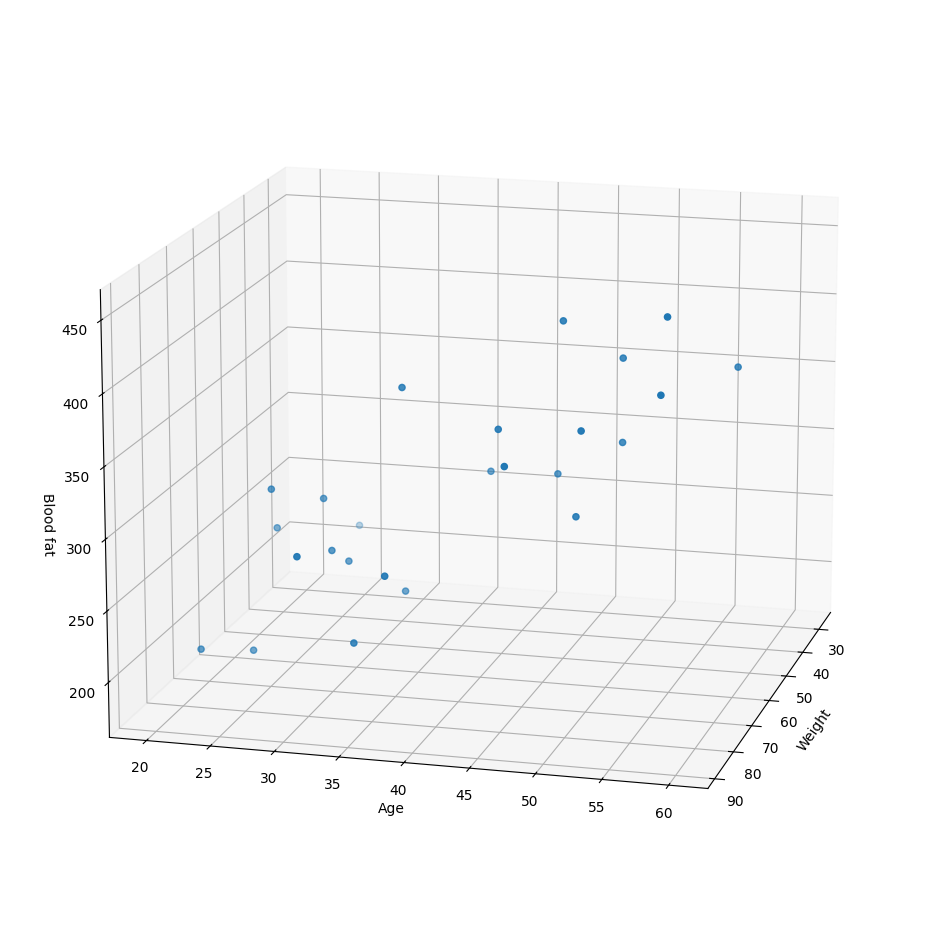

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ICT/data/Blood_fat.csv', delimiter=',')

x1 = [d[0] for d in data]
x2 = [d[1] for d in data]
y_data = [d[2] for d in data]

a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y = a1 * x1 + a2 * x2 + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

learning_rate = 0.001

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0:
            print("Epoch : %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y 절편 b = %.4f" % (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))
        if step == 2000:
            da1 = sess.run(a1)
            da2 = sess.run(a2)
            db = sess.run(b)
            print(da1)
            print(da2)
            print(db)
            print(type(da1))

calc_y = []
for i in range(25):
    new_y = (da1 * x1[i]) + (da2 * x2[i]) + db
    calc_y.append(new_y.item())
    print(new_y.item())


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y_data)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

0 loss: 442.400554990704, w1: [7.96013736], w2:[2.78848074], b: [79.35944148]
1000 loss: 41.95248821799954, w1: [0.72037838], w2:[4.65498764], b: [79.28536731]
2000 loss: 41.3820495296493, w1: [0.42191227], w2:[5.17645236], b: [79.28361052]
3000 loss: 41.37991687982979, w1: [0.40373155], w2:[5.20823746], b: [79.28266784]
4000 loss: 41.379908285574224, w1: [0.40264111], w2:[5.21016454], b: [79.2817755]
5000 loss: 41.37990746739633, w1: [0.40258464], w2:[5.21028518], b: [79.28088677]
6000 loss: 41.379906678755816, w1: [0.40259072], w2:[5.21029652], b: [79.27999883]
7000 loss: 41.37990589129762, w1: [0.40260058], w2:[5.21030125], b: [79.27911151]
8000 loss: 41.37990510491647, w1: [0.40261066], w2:[5.21030558], b: [79.2782248]
9000 loss: 41.379904319610525, w1: [0.40262075], w2:[5.21030988], b: [79.27733869]
10000 loss: 41.379903535378304, w1: [0.40263083], w2:[5.21031418], b: [79.27645319]
[0.40263083]
[5.21031418]
[79.27645319]
<class 'numpy.ndarray'>
352.77189527839
212.87478751737132
3

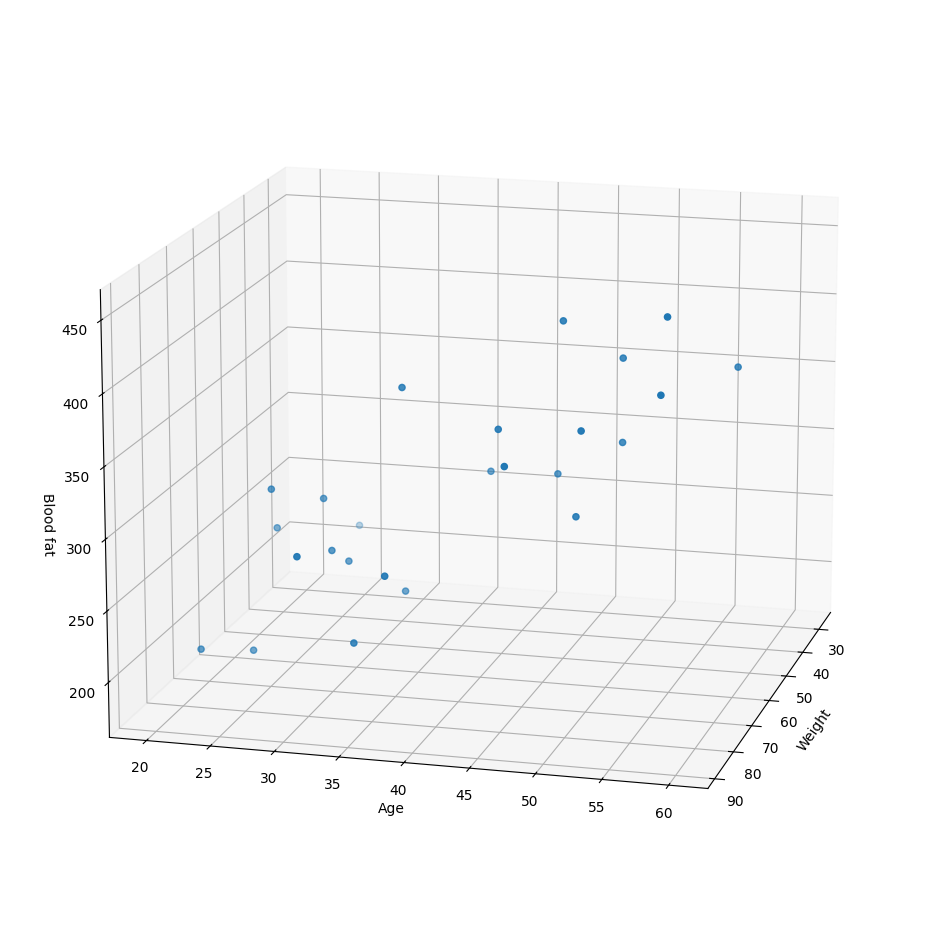

In [11]:
import tensorflow as tf
import numpy as np

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ICT/data/Blood_fat.csv', delimiter=',')

x1 = [d[0] for d in data]
x2 = [d[1] for d in data]
y_data = [d[2] for d in data]

w1 = tf.Variable(tf.random.uniform([1], 0, 10, dtype=tf.float64, seed=0))
w2 = tf.Variable(tf.random.uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype=tf.float64, seed=0))

def hypothesis(w1, w2, b):
    return x1 * w1 + x2 * w2 + b
def cost(w1, w2, b):
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(w1, w2, b) - y_data)))

opt = tf.keras.optimizers.SGD(learning_rate=0.001)

for i in range(10001):
    with tf.GradientTape() as tape:
        loss = cost(w1, w2, b)
    gradient = tape.gradient(loss, [w1, w2, b])
    opt.apply_gradients(zip(gradient, [w1, w2, b]))
    if i % 1000 == 0:
        print(i, f'loss: {loss.numpy()}, w1: {w1.numpy()}, w2:{w2.numpy()}, b: {b.numpy()}')
    if i == 10000:
            da1 = w1.numpy()
            da2 = w2.numpy()
            db = b.numpy()
            print(da1)
            print(da2)
            print(db)
            print(type(da1))

calc_y = []
for i in range(25):
    new_y = (da1 * x1[i]) + (da2 * x2[i]) + db
    calc_y.append(new_y.item())
    print(new_y.item())


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y_data)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()
